## M6W3 - Unsupervised Learning

One of the main applications of unsupervised learning is dimensionality reduction / feature selection. Often it is a step preceding building a supervised learning model with labelled data. Other times, we don’t have a label but still need to perform dimensionality reduction and/or find clusters in the data.

In this assignment, I have been asked to work on the Mercedes- Benz Greener Manufacturing challenge from Kaggle:

The data has been anonymised and there is target, called ‘y’ but we will not be training a supervised model in this assignment.

I will perform a principle component analysis (PCA) and answer the following questions:

1) How many components will you choose based on an explained variance ratio of your choice? Plot the proportion of explained variance and the number of components.

One downside of PCA is that it maps all the original features to a lower dimensional space, resulting in less interpretable features. Let’s say we want to use the result of the PCA but still work with the original features. Here is what I will do:

2) Using the selected number of components, find which features of the original data have the highest absolute correlation with each of the components. Select features with absolute correlation with the PCA components of at least 0,75. How many and which features will you end up with?

In [1]:
#Import required packages
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [2]:
#Import the data
df = pd.read_csv('train.csv')
print('Data shape: ', df.shape, '\n')
print(df.head, '\n')
print(df.info())

Data shape:  (4209, 378) 

<bound method NDFrame.head of         ID       y  X0 X1  X2 X3 X4  X5 X6 X8  ...  X375  X376  X377  X378  \
0        0  130.81   k  v  at  a  d   u  j  o  ...     0     0     1     0   
1        6   88.53   k  t  av  e  d   y  l  o  ...     1     0     0     0   
2        7   76.26  az  w   n  c  d   x  j  x  ...     0     0     0     0   
3        9   80.62  az  t   n  f  d   x  l  e  ...     0     0     0     0   
4       13   78.02  az  v   n  f  d   h  d  n  ...     0     0     0     0   
...    ...     ...  .. ..  .. .. ..  .. .. ..  ...   ...   ...   ...   ...   
4204  8405  107.39  ak  s  as  c  d  aa  d  q  ...     1     0     0     0   
4205  8406  108.77   j  o   t  d  d  aa  h  h  ...     0     1     0     0   
4206  8412  109.22  ak  v   r  a  d  aa  g  e  ...     0     0     1     0   
4207  8415   87.48  al  r   e  f  d  aa  l  u  ...     0     0     0     0   
4208  8417  110.85   z  r  ae  c  d  aa  g  w  ...     1     0     0     0   

      

In [3]:
#There are columns containing non-numerical values
#I will remove using get_dummies to convert to indicator variables
df = pd.get_dummies(df, drop_first=True)
print(df.head())

   ID       y  X10  X11  X12  X13  X14  X15  X16  X17  ...  X8_p  X8_q  X8_r  \
0   0  130.81    0    0    0    1    0    0    0    0  ...     0     0     0   
1   6   88.53    0    0    0    0    0    0    0    0  ...     0     0     0   
2   7   76.26    0    0    0    0    0    0    0    1  ...     0     0     0   
3   9   80.62    0    0    0    0    0    0    0    0  ...     0     0     0   
4  13   78.02    0    0    0    0    0    0    0    0  ...     0     0     0   

   X8_s  X8_t  X8_u  X8_v  X8_w  X8_x  X8_y  
0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0  
2     0     0     0     0     0     1     0  
3     0     0     0     0     0     0     0  
4     0     0     0     0     0     0     0  

[5 rows x 557 columns]


In [4]:
#Look for missing values
nullseries = df.isnull().sum()
print(nullseries[nullseries > 0])

Series([], dtype: int64)


There are no missing values to deal with in this data and on inspection the data looks to be in order.

I have not included the `test.csv` data as it does not have any values for `y` which is the time taken to pass and may prove to be a valuable feature.

I will use `StandardScaler` to normalise the values in `y`.

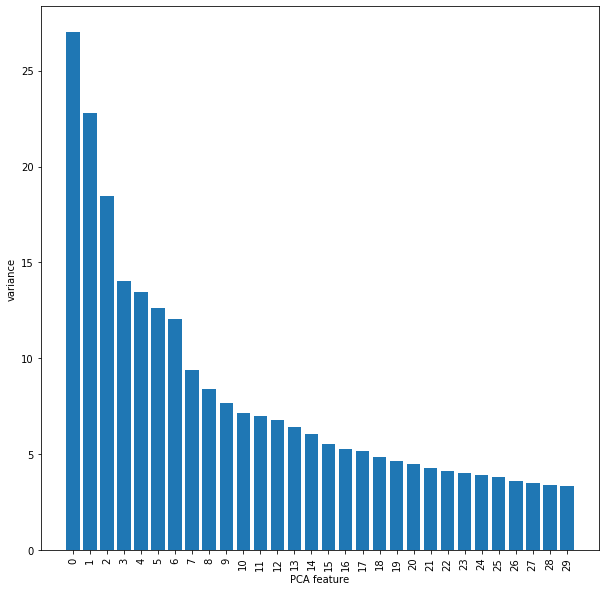

In [5]:
#Build pipeline and plot components
scaler = StandardScaler()
#Using 30 to make things easier to view on chart
pca = PCA(n_components=30)

#Construct and fit pipeline
pipeline = make_pipeline(scaler, pca)
pipeline.fit(df)

#Plot variance vs PCA feature
features = range(pca.n_components)
_ = plt.figure(figsize=(10,10))
_ = plt.bar(features, pca.explained_variance_)
_ = plt.xticks(rotation=90)
_ = plt.xlabel('PCA feature')
_ = plt.ylabel('variance')
_ = plt.xticks(features)
plt.show()

I will use 1 component as it stands out above the rest.

Let's double check this using the variance ratio to try and capture 95% of the variance.

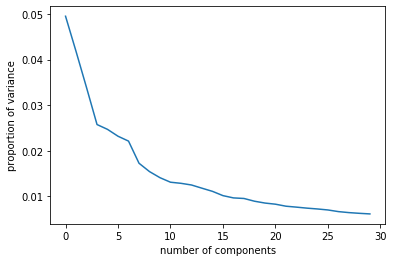

How many components does the 95% explained variance retain:  1


In [6]:
#Plot explained variance vs. components
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('number of components')
plt.ylabel('proportion of variance')
plt.show()

#Confirm number of components needed for 95% variance
pca_95 = PCA(n_components=0.95).fit(df)
components_pca_95 = pca_95.transform(df)
print('How many components does the 95% explained variance retain:  {}'.format(components_pca_95.shape[1]))

From the above it is shown that only one component is needed to capture 95% of the variance.

Next let's check where we have features with absolute correlation with the PCA components of at least 0.75.

In [7]:
pca2 = PCA(n_components=1)
pipeline2 = make_pipeline(scaler, pca2)
trans_data = pipeline2.fit_transform(df)

#Convert to pandas DataFrame
df_pca = pd.DataFrame(trans_data, columns = ['PC1'])
df_pca.head()

,PC1
0,13.273314
1,0.119087
2,9.717569
3,6.867775
4,6.249538


In [8]:
#Let's find the correlation between original data and principal component
corr_pc = pd.DataFrame(df.corrwith(df_pca['PC1']), columns = ['PC1'])
corr_pc = corr_pc.abs()

#Next let's find where they have an absolute correlation of at least 0.75
print(corr_pc[corr_pc['PC1'] >= 0.75])
print('Features we would be left with at an absolute correlation of at least 0.75: ', len(corr_pc[corr_pc['PC1'] >= 0.75]))

            PC1
X48    0.848102
X66    0.839911
X80    0.854761
X98    0.757363
X101   0.784842
X111   0.845786
X113   0.848102
X126   0.847031
X128   0.837068
X130   0.837068
X134   0.848102
X147   0.848102
X170   0.789912
X179   0.795640
X198   0.848719
X222   0.848102
X264   0.845906
X265   0.778590
X348   0.856539
X0_ap  0.842205
X2_s   0.848102
Features we would be left with at an absolute correlation of at least 0.75:  21
